In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'train'
TEST_DIR = 'test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                      image     label
0         train\angry\Training_10118481.jpg     angry
1         train\angry\Training_10120469.jpg     angry
2         train\angry\Training_10131352.jpg     angry
3         train\angry\Training_10161559.jpg     angry
4          train\angry\Training_1021836.jpg     angry
...                                     ...       ...
28704  train\surprise\Training_99916297.jpg  surprise
28705  train\surprise\Training_99924420.jpg  surprise
28706  train\surprise\Training_99937001.jpg  surprise
28707  train\surprise\Training_99951755.jpg  surprise
28708  train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                                      image     label
0       test\angry\PrivateTest_10131363.jpg     angry
1       test\angry\PrivateTest_10304478.jpg     angry
2        test\angry\PrivateTest_1054527.jpg     angry
3       test\angry\PrivateTest_10590091.jpg     angry
4        test\angry\PrivateTest_1109992.jpg     angry
...                                     ...       ...
7173  test\surprise\PublicTest_98089595.jpg  surprise
7174  test\surprise\PublicTest_98567249.jpg  surprise
7175  test\surprise\PublicTest_98972870.jpg  surprise
7176  test\surprise\PublicTest_99242645.jpg  surprise
7177  test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         test\angry\PrivateTest_10131363.jpg
1         test\angry\PrivateTest_10304478.jpg
2          test\angry\PrivateTest_1054527.jpg
3         test\angry\PrivateTest_10590091.jpg
4          test\angry\PrivateTest_1109992.jpg
                        ...                  
7173    test\surprise\PublicTest_98089595.jpg
7174 

In [8]:
from tqdm.notebook import tqdm

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale= True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [14]:
train_features = extract_features(train['image']) 


  0%|          | 0/28709 [00:00<?, ?it/s]

In [15]:
test_features = extract_features(test['image'])


  0%|          | 0/7178 [00:00<?, ?it/s]

In [16]:

x_train = train_features/255.0
x_test = test_features/255.0


In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [19]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [20]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [21]:

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Input layer
input_layer = Input(shape=(48, 48, 1))

# Convolutional layers
model.add(input_layer)
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.2416 - loss: 1.8347 - val_accuracy: 0.2471 - val_loss: 1.8196
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.2533 - loss: 1.8150 - val_accuracy: 0.2471 - val_loss: 1.8190
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.2499 - loss: 1.8121 - val_accuracy: 0.2522 - val_loss: 1.7930
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.2692 - loss: 1.7635 - val_accuracy: 0.3217 - val_loss: 1.6600
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 230s 1s/step - accuracy: 0.3252 - loss: 1.6754 - val_accuracy: 0.4055 - val_loss: 1.5080
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 249s 1s/step - accuracy: 0.3835 - loss: 1.5756 - val_accuracy: 0.4356 - val_loss: 1.4316
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.4255 - loss: 1.4946 - val_accuracy: 0.4675 - val_loss: 1.3576
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.4461 - loss: 1.4388 - 

In [28]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [29]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [30]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [34]:
image = 'C:\coding internship program\.vscode\Face_Emotion_Recognition/train/sad/Training_594115.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
model prediction is  sad


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
model prediction is  sad


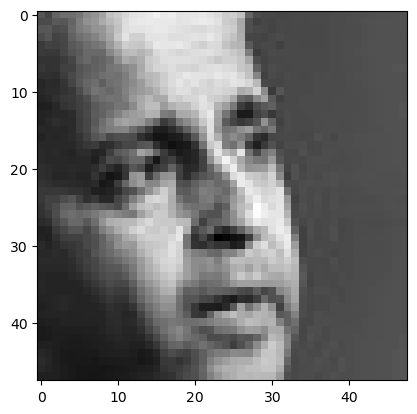

In [38]:
image = 'C:/coding internship program/.vscode/Face_Emotion_Recognition/train/sad/Training_594115.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  fear


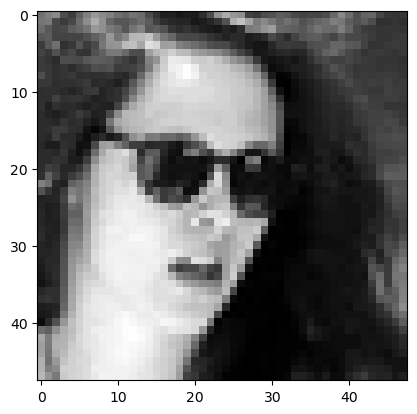

In [39]:
image = 'C:/coding internship program/.vscode/Face_Emotion_Recognition/train/fear/Training_311686.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [40]:
from keras.models import load_model
import cv2

# Load the model
model = load_model('emotiondetector.h5')

# Load the face detection model
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [41]:
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the camera
    ret, frame = cap.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Predict the emotion of each face
    for (x, y, w, h) in faces:
        # Crop the face from the frame
        face = gray[y:y+h, x:x+w]

        # Resize the face to the input shape of the model
        face = cv2.resize(face, (48, 48))

        # Convert the face to a numpy array
        face = np.expand_dims(face, axis=0)
        face = np.expand_dims(face, axis=3)

        # Predict the emotion of the face
        emotion = model.predict(face)[0]

        # Print the emotion
        print(emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
[1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2246849e-28 0.0000000e+00
 8.9110448e-20 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[4.9041727e-18 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.2463447e-21 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 4.3335287e-13 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[5.2495848e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.9947506e-01 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[0.99524224 0.         0.         0.         0.         0.0047578
 0.        ]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[2.9020047e-10 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.0000000e+00 0.0000000e+00]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[5.1005375


KeyboardInterrupt



In [44]:
# Draw a rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display the predicted emotion inside the rectangle
for (x, y, w, h) in faces:
    cv2.putText(frame, emotion_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display the frame
cv2.imshow('frame', frame)

# Exit the loop when the user presses the 'q' key
if cv2.waitKey(1) & 0xFF == ord('q'):
    break

# Release the camera and close the windows
cap.release()
cv2.destroyAllWindows()

NameError: name 'emotion_name' is not defined

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
model prediction is  angry


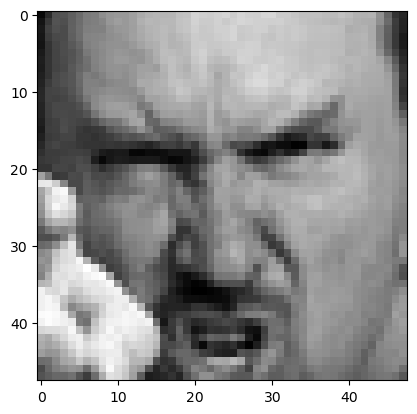

In [43]:
image = 'C:/coding internship program/.vscode/Face_Emotion_Recognition/train/angry/Training_332231.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [5]:
from keras.models import model_from_json


In [6]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [7]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [8]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [9]:
image = 'C:/coding internship program/.vscode/Face_Emotion_Recognition/train/angry/Training_332231.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry


C:\Users\manish mittal\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
model prediction is  angry


NameError: name 'plt' is not defined

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  angry


C:\Users\manish mittal\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


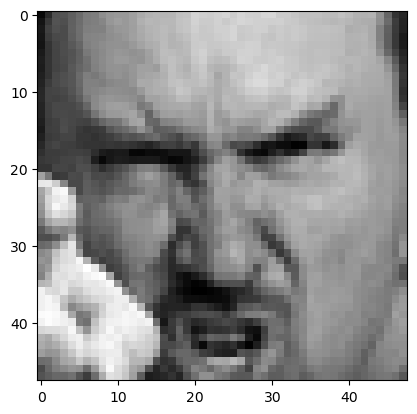

In [11]:
image = 'C:/coding internship program/.vscode/Face_Emotion_Recognition/train/angry/Training_332231.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')